# I.Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
pd.set_option('display.max_columns', 34)

In [74]:
data = pd.read_csv('hotelsBookingDemand.csv')

In [4]:
len(data) 

119390

In [5]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# II. Data preprocessing
**1. Verify missing values**

In [6]:
data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

**2. Drop rows having missing values except for variables like Agent or Company, “NULL” is presented as one of the categories**

In [7]:
data.dropna(axis=0,subset=['country','children'],inplace=True)

In [8]:
data.isna().sum(),len(data)

(hotel                                  0
 is_canceled                            0
 lead_time                              0
 arrival_date_year                      0
 arrival_date_month                     0
 arrival_date_week_number               0
 arrival_date_day_of_month              0
 stays_in_weekend_nights                0
 stays_in_week_nights                   0
 adults                                 0
 children                               0
 babies                                 0
 meal                                   0
 country                                0
 market_segment                         0
 distribution_channel                   0
 is_repeated_guest                      0
 previous_cancellations                 0
 previous_bookings_not_canceled         0
 reserved_room_type                     0
 assigned_room_type                     0
 booking_changes                        0
 deposit_type                           0
 agent                            

**3. Change arrival year, month and day feature to datetime format called arrival_date.**

In [9]:
data['arrival_date']=data['arrival_date_day_of_month'].astype(str)+'th of '+data['arrival_date_month'].astype(str)+', '+data['arrival_date_year'].astype(str)

In [10]:
data['arrival_date']=pd.to_datetime(data['arrival_date'])

In [11]:
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,2017-08-30
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,2017-08-31
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,2017-08-31
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,2017-08-31


**4. Verify that the timestamp of the variable reservation_status_date must occur after or at the same date as the input variable arrival_date**

In [12]:
data["reservation_status_date"]=pd.to_datetime(data["reservation_status_date"])

In [13]:
test = data["reservation_status_date"]<=data['arrival_date']

In [14]:
test2=test.loc[test==True].index

In [15]:
len(test2)

44854

**5. Propose a preprocessing to be made on this dataset.**

Premèire méthode

In [16]:
data.loc[data["reservation_status_date"]<=data['arrival_date'],'reservation_status_date']=list(data['arrival_date'][test2].values)

In [17]:
test = data["reservation_status_date"]<data['arrival_date']
test2=test.loc[test==True].index
len(test2)

0

## III. Exploratory data analysis:

In [18]:
categorical=['hotel','is_canceled','meal','country','market_segment'
             ,'distribution_channel','is_repeated_guest','reserved_room_type','assigned_room_type',
             'deposit_type','customer_type','reservation_status']
len(categorical)

12

In [19]:
cat=[]
for i in categorical:
    cat.append(len(data[i].unique()))

In [20]:
num=list(set(data.columns) - set(categorical))
num=list(set(num)-set(['arrival_date_year','arrival_date_month','arrival_date_week_number','arrival_date_day_of_month','reservation_status_date','arrival_date']))
num

['lead_time',
 'babies',
 'required_car_parking_spaces',
 'agent',
 'stays_in_week_nights',
 'children',
 'booking_changes',
 'days_in_waiting_list',
 'stays_in_weekend_nights',
 'adults',
 'company',
 'total_of_special_requests',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'adr']

In [21]:
date = list(set(data.columns) - set(categorical)-set(num))

**1. Create dataset summary statistics – Date variables.**

In [22]:
data['count']=1
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,count
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,1
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,1
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,1


In [23]:
date_t = data['arrival_date'].unique()

In [24]:
sum_t=[]
for i in date_t:
    sum_t.append(sum(data.loc[data['arrival_date']==i,'count']))

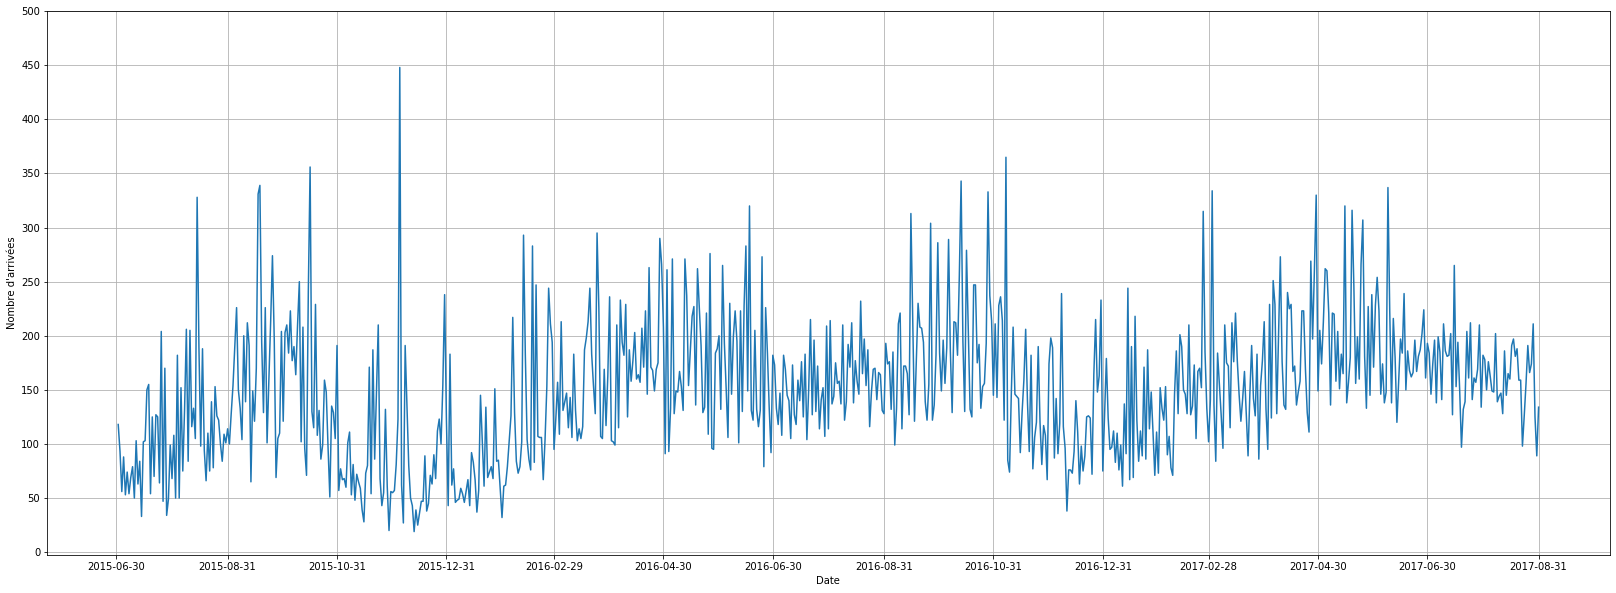

In [25]:
plt.rcParams["figure.figsize"] = (28,10)

plt.plot(date_t[:784],sum_t[:784])
plt.xticks(pd.date_range('2015-06','2017-10',freq='2M'))
plt.yticks(np.arange(0,550,50))
plt.grid()
plt.xlabel('Date')
plt.ylabel("Nombre d'arrivées")
plt.show()

In [26]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']
sum_t1=[]
for i in months:
    sum_t1.append(sum(data.loc[data['arrival_date_month']==i,'count']))

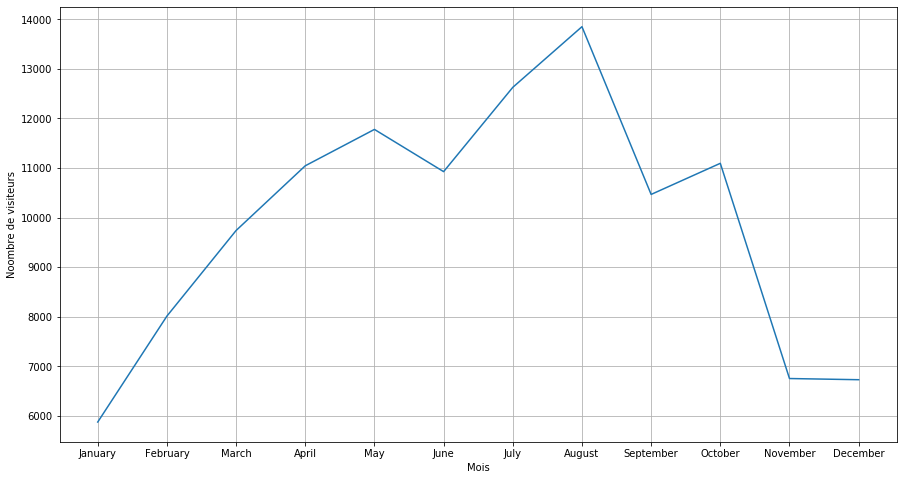

In [27]:
plt.rcParams["figure.figsize"] = (15,8)
plt.plot(months,sum_t1)
plt.grid()
plt.xlabel('Mois')
plt.ylabel('Noombre de visiteurs')
plt.show()

**2. Create dataset summary statistics – Categorical variables**

In [28]:
categorical

['hotel',
 'is_canceled',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status']

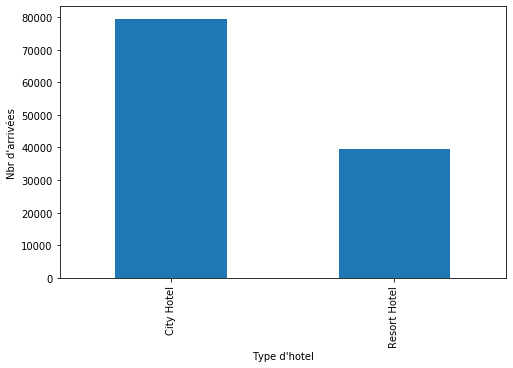

In [71]:
plt.rcParams["figure.figsize"] = (8,5)
data['hotel'].value_counts().plot(kind='bar')
plt.xlabel("Type d'hotel")
plt.ylabel("Nbr d'arrivées")
plt.show()

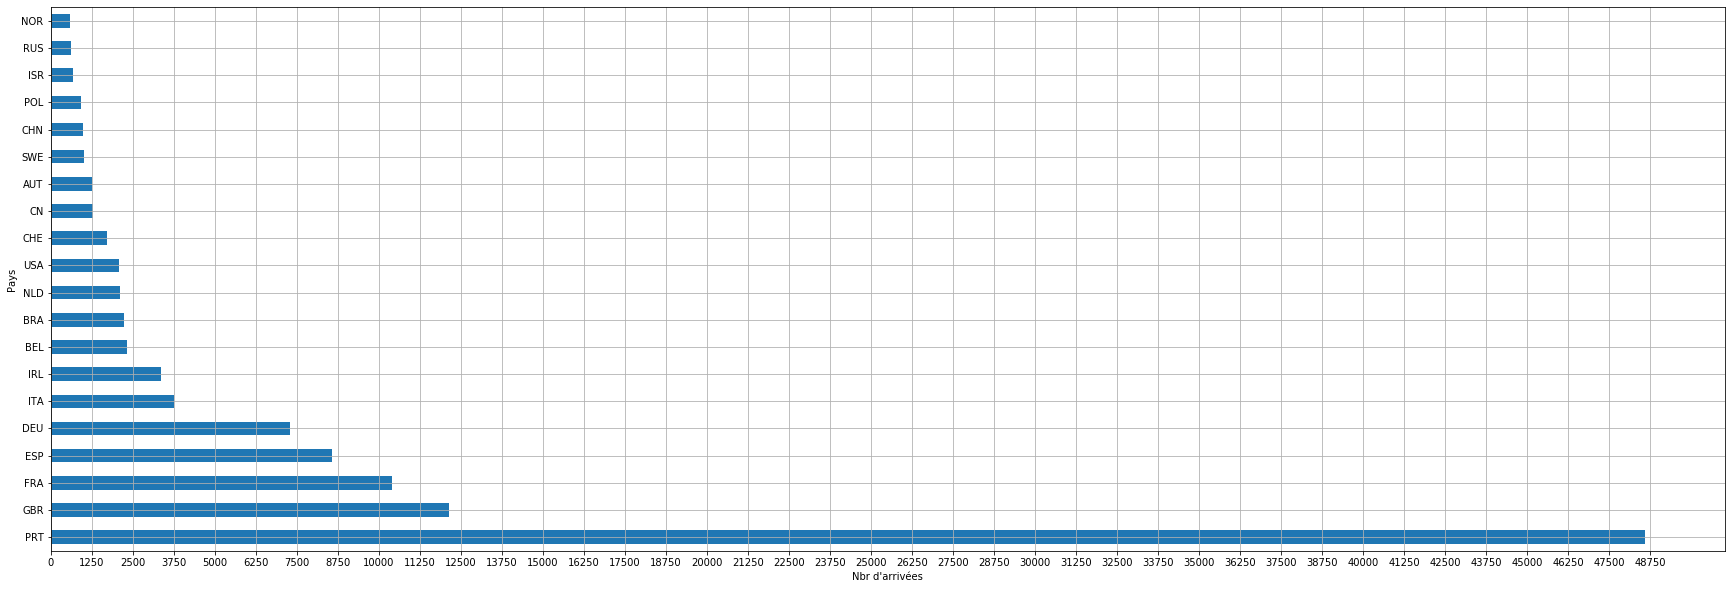

In [72]:
plt.rcParams["figure.figsize"] = (30,10)
data['country'].value_counts().head(20).plot(kind='barh')
plt.xticks(np.arange(0,50000,1250))
plt.ylabel("Pays")
plt.xlabel("Nbr d'arrivées")
plt.grid()
plt.show()

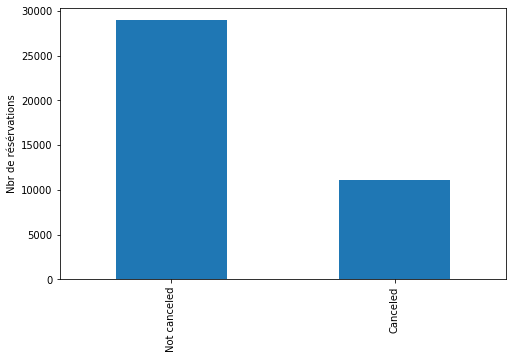

In [75]:
plt.rcParams["figure.figsize"] = (8,5)
data.loc[data['hotel']=='Resort Hotel','is_canceled'].value_counts().plot(kind='bar')
plt.xticks([0,1],labels=['Not canceled','Canceled'])
plt.ylabel("Nbr de résérvations")
plt.show()

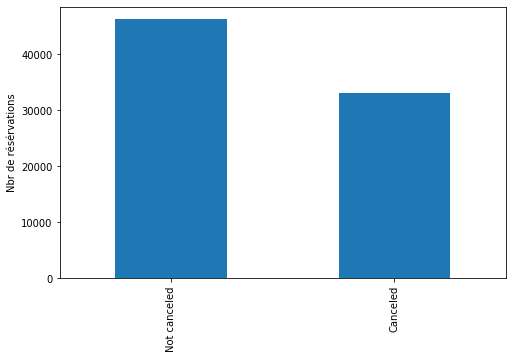

In [76]:
plt.rcParams["figure.figsize"] = (8,5)
data.loc[data['hotel']=='City Hotel','is_canceled'].value_counts().plot(kind='bar')
plt.xticks([0,1],labels=['Not canceled','Canceled'])
plt.ylabel("Nbr de résérvations")
plt.show()

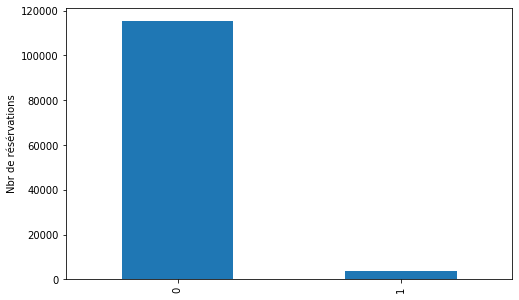

In [77]:
plt.rcParams["figure.figsize"] = (8,5)
data['is_repeated_guest'].value_counts().plot(kind='bar')
plt.ylabel("Nbr de résérvations")
plt.show()

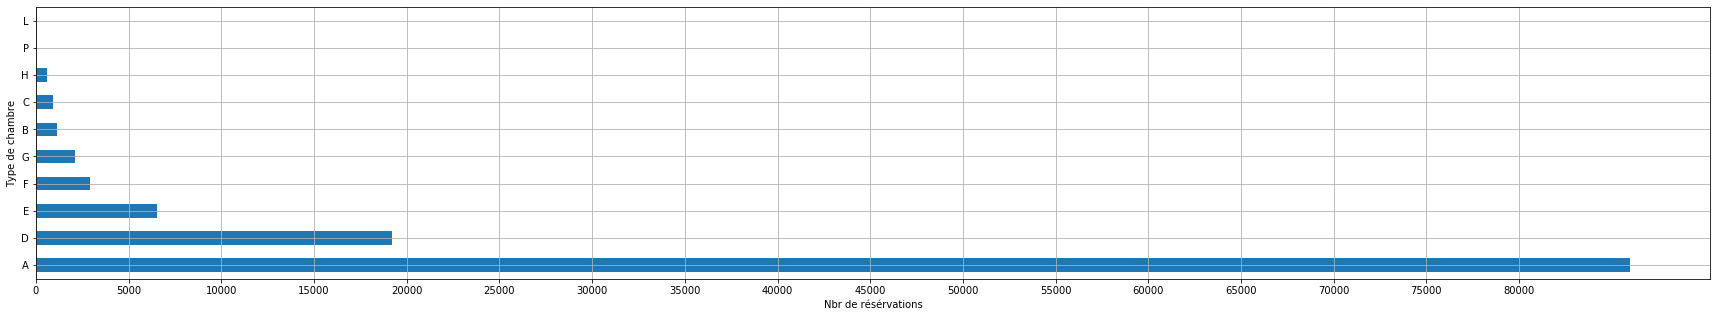

In [78]:
plt.rcParams["figure.figsize"] = (30,5)
data['reserved_room_type'].value_counts().plot(kind='barh')
plt.xticks(np.arange(0,85000,5000))
plt.ylabel("Type de chambre")
plt.xlabel("Nbr de résérvations")
plt.grid()
plt.show()
plt.show()

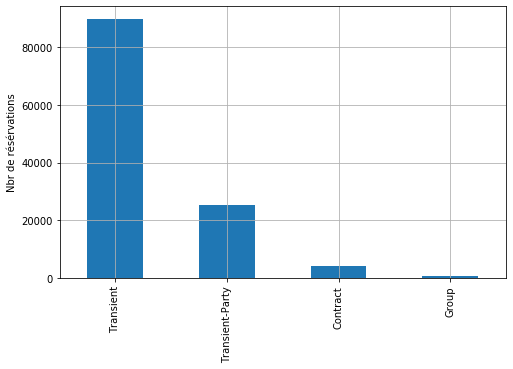

In [79]:
plt.rcParams["figure.figsize"] = (8,5)
data['customer_type'].value_counts().plot(kind='bar')
plt.ylabel("Nbr de résérvations")
plt.grid()
plt.show()

**3. Create dataset summary statistics – Integer and numeric variables.**

In [36]:
data['children'].value_counts()

0.0     110319
1.0       4852
2.0       3650
3.0         76
10.0         1
Name: children, dtype: int64

In [37]:
data['previous_cancellations'].value_counts()

0     112451
1       6017
2        113
3         65
24        48
11        35
4         31
26        26
25        25
6         22
19        19
5         19
14        14
13        12
21         1
Name: previous_cancellations, dtype: int64

In [38]:
data['lead_time'].describe()
#Nombre de jour entre la résérvation et le jour d'arrivée

count    118898.000000
mean        104.311435
std         106.903309
min           0.000000
25%          18.000000
50%          69.000000
75%         161.000000
max         737.000000
Name: lead_time, dtype: float64

In [39]:
data['adr'].describe()
#la moyennes des transactions faites sur les nombres des nuits dans l'hotel 

count    118898.000000
mean        102.003243
std          50.485862
min          -6.380000
25%          70.000000
50%          95.000000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

In [40]:
data.loc[data['adr']<0]


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,count
14969,Resort Hotel,0,195,2017,March,10,5,4,6,2,0.0,0,BB,GBR,Groups,Direct,1,0,2,A,H,2,No Deposit,273.0,NaN,0,Transient-Party,-6.38,0,0,Check-Out,2017-03-15,2017-03-05,1


In [41]:
data.drop(14969,0,inplace=True)

**4. Check the distribution of hotel type for cancellation**

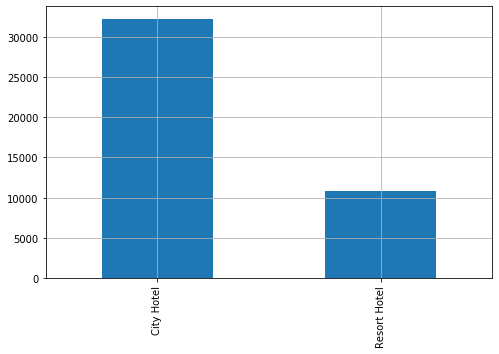

In [42]:
data.loc[data['reservation_status']=='Canceled','hotel'].value_counts().plot(kind='bar')
plt.grid()
plt.show()

**5. Plot distribution of cancellation and Number of Adults**

In [80]:
data.loc[data['reservation_status']=='Canceled','adults'].value_counts()

2     34548
1      6228
3      2104
0       105
4        16
26        5
27        2
20        2
5         2
55        1
50        1
10        1
40        1
6         1
Name: adults, dtype: int64

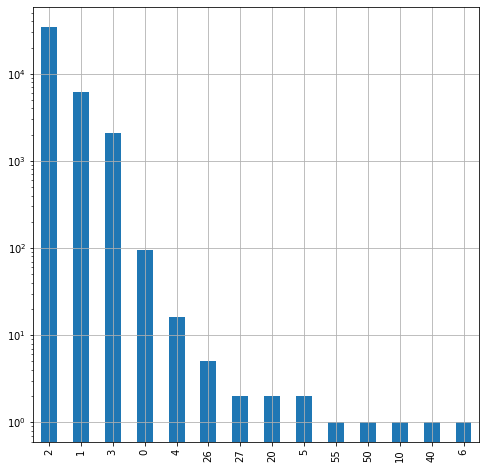

In [44]:
plt.rcParams["figure.figsize"] = (8,8)
data.loc[data['reservation_status']=='Canceled','adults'].value_counts().plot(kind='bar')
plt.yscale("log")
plt.grid()
plt.show()

**6. Taking in consideration the characteristics of the variables included in this dataset propose two possible modeling this dataset can have an important role for research and education in revenue management (i.e define two possible target variables and the purpose of each analysis)**



1- D'abord, on peut utiliser ses données pour essaier de prédire si un client va annuler sa résérvation ou pas, cela va permettre aux hotels de minimiser leurs risques.




2- Deuxièmement, on peut essaier de comprendre pourquoi les clients revient à notre établissement(en utilisant is_repeated_guest), cela permettra aux hotels d'améliorer leurs services.

# II. Data preprocessing
**5. Propose a preprocessing to be made on this dataset.**

Deuxième méthode

In [45]:
data.head(1)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,count
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,1


In [46]:
data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16004
company         

In [47]:
data['company'].fillna(-1,inplace=True)

In [48]:
data['agent'].fillna(0,inplace=True)

In [49]:
data.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [50]:
data.drop('count',1,inplace=True)

In [51]:
data.head(1)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,-1.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01


In [52]:
mon=data['arrival_date_month'].unique()
import datetime
month=[]
for i in mon:
    month.append(datetime.datetime.strptime(i[:3], "%b").month)
months={}
for i in range(len(mon)):
    months[mon[i]]=month[i]

In [53]:
months={}
for i in range(len(mon)):
    months[mon[i]]=month[i]

In [54]:
data['arrival_date_month'] = data['arrival_date_month'].map(months)
data.head(1)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,-1.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01


In [55]:
data['reservation_status_date_day'] = pd.DatetimeIndex(data['reservation_status_date']).day
data['reservation_status_date_year'] = pd.DatetimeIndex(data['reservation_status_date']).year
data['reservation_status_date_month'] = pd.DatetimeIndex(data['reservation_status_date']).month

In [56]:
data.head(1)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,reservation_status_date_day,reservation_status_date_year,reservation_status_date_month
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,...,C,C,3,No Deposit,0.0,-1.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,1,2015,7


In [57]:
data.drop(['arrival_date','reservation_status_date'],1,inplace=True)

In [58]:
data.head(1)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date_day,reservation_status_date_year,reservation_status_date_month
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,-1.0,0,Transient,0.0,0,0,Check-Out,1,2015,7


In [59]:
get_d = list(set(categorical)-set(['is_canceled','is_repeated_guest','reservation_status']))
data[get_d].dtypes

country                 object
assigned_room_type      object
distribution_channel    object
deposit_type            object
customer_type           object
hotel                   object
meal                    object
reserved_room_type      object
market_segment          object
dtype: object

# IV. Modeling

In [60]:
pd.get_dummies(data[['is_canceled','reservation_status']],columns=['reservation_status']).corr()
#On supprime les deux colonnes, vu que reservation_status contient la réponse

,is_canceled,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show
is_canceled,1.000000,0.978440,-1.000000,0.131542
reservation_status_Canceled,0.978440,1.000000,-0.978440,-0.076029
reservation_status_Check-Out,-1.000000,-0.978440,1.000000,-0.131542
reservation_status_No-Show,0.131542,-0.076029,-0.131542,1.000000


In [61]:
Y=data['is_canceled']
data.drop(['is_canceled','reservation_status'],1,inplace=True)

In [62]:
X=pd.get_dummies(data,columns=get_d,drop_first=True)


In [63]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import xgboost as xgb
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
clf = LogisticRegression(random_state=0,C=1,solver='liblinear',max_iter=700,tol=1e-9)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.8542472666105971

In [67]:
import xgboost as xgb

In [68]:
clf_xgb=xgb.XGBClassifier( learning_rate =0.05, n_estimators=800, max_depth=7,
 min_child_weight=5, gamma=0.3, subsample=0.8, colsample_bytree=0.7,
 objective= 'binary:logistic', scale_pos_weight=0.6,seed=27,n_jobs=-1)
clf_xgb.fit(X_train, y_train)
y_pred=clf_xgb.predict(X_test)
accuracy_score(y_test,y_pred)

C:\Users\Taha\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:27:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9994953742640875

In [69]:
y_pred=clf_xgb.predict_proba(X_test)*0.8+clf.predict_proba(X_test)*0.2
y_pred = y_pred[:,0]
for i in range(len(y_pred)):
    if y_pred[i]<=0.5:
        y_pred[i]=1    
    else:
        y_pred[i]=0
accuracy_score(y_test,y_pred)

0.9991589571068125